In [108]:
import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
import torch
import torch.nn as nn
import random
import json
from torch.utils.data import Dataset, DataLoader
from tkinter import *
from matplotlib import pyplot as plt

In [109]:
with open("starwars_bar.json", "r", encoding="utf-8" ) as f:
    intents = json.load(f)

In [110]:
def tokenize(sentence):
    return nltk.word_tokenize(sentence)

def stem(word):
    return stemmer.stem(word.lower())

In [111]:
def bag_of_words(tokenized_sentence, words):
    # stem each word
    sentence_words = [stem(word) for word in tokenized_sentence]
    # initialize bag with 0 for each word
    bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words:
            bag[idx] = 1

    return bag

In [112]:
all_words = []
tags = []
xy = []
# повторите каждое предложение в наших шаблонах намерений
for intent in intents["intents"]:
    tag = intent["tag"]
    # добавить в список тегов
    tags.append(tag)
    for pattern in intent["patterns"]:
        # обозначить каждое слово в предложении
        w = tokenize(pattern)
        # добавить в наш список слов
        all_words.extend(w)
        # добавить в пару xy
        xy.append((w, tag))
print(xy)

[(['Привет'], 'приветствие'), (['Эй'], 'приветствие'), (['Как', 'дела'], 'приветствие'), (['Кто-нибудь', 'есть', '?'], 'приветствие'), (['Привет'], 'приветствие'), (['Добрый', 'день'], 'приветствие'), (['Что', 'случилось'], 'приветствие'), (['Ку', '!'], 'приветствие'), (['Здарова'], 'приветствие'), (['Приятно', 'познакомиться', '.'], 'приветствие'), (['Привет', ',', 'что', 'нового', '?'], 'приветствие'), (['Пока'], 'досвидания'), (['Увидимся', 'позже', '.'], 'досвидания'), (['До', 'свидания'], 'досвидания'), (['Хорошего', 'дня', '.'], 'досвидания'), (['Увидимся', 'в', 'следующий', 'раз', '.'], 'досвидания'), (['Это', 'было', 'мое', 'удовольствие', '.'], 'досвидания'), (['Берегись', '.'], 'досвидания'), (['Увидимся', '!'], 'досвидания'), (['Увидимся', 'позже', '.'], 'досвидания'), (['Чао', '.'], 'досвидания'), (['Спасибо'], 'благодарность'), (['Благадарю', 'вас'], 'благодарность'), (['Это', 'было', 'полезно'], 'благодарность'), (['Большое', 'спасибо', '!'], 'благодарность'), (['Спс'], '

In [113]:
ignore_words = ["?", ".", "!"]
all_words = [stem(w) for w in all_words if w not in ignore_words]
# удалить повторения и сортировать
all_words = sorted(set(all_words))
tags = sorted(set(tags))

In [114]:
print(len(xy), "patterns")
print(len(tags), "tags:", tags)
print(len(all_words), "unique stemmed words:", all_words)

100 patterns
16 tags: ['Живой', 'Меню', 'Помощь', 'Шутки', 'благодарность', 'джедай', 'досвидания', 'задачи', 'истории', 'миссия', 'обо мне', 'охотник за головами', 'приветствие', 'ситх ', 'создатель', 'я']
157 unique stemmed words: [',', '10', 'анекдот', 'бара', 'баре', 'барное', 'бегать', 'беде', 'берегись', 'благадарю', 'большое', 'было', 'в', 'вас', 'вау', 'ваш', 'вы', 'выбор', 'выпить', 'галактике', 'говорить', 'головами', 'давайте', 'дела', 'день', 'джедаев', 'джедай', 'джедая', 'для', 'дня', 'до', 'добрый', 'дышать', 'есть', 'еще', 'живой', 'за', 'задании', 'здарова', 'здорово', 'знаете', 'знаешь', 'из', 'историю', 'ищу', 'как', 'какие', 'какой', 'кого', 'кого-нибудь', 'кое', 'который', 'кто', 'кто-нибудь', 'ку', 'ли', 'лучшего', 'лучший', 'лучших', 'любая', 'меню', 'меня', 'миссией', 'миссии', 'михаил', 'михаила', 'михаиле', 'мне', 'мое', 'моей', 'может', 'можете', 'можешь', 'на', 'надеюсь', 'напитки', 'немного', 'нового', 'нужна', 'нужно', 'о', 'обслуживаете', 'опознай', 'особ

In [115]:
# create training data
X_train = []
y_train = []
for (pattern_sentence, tag) in xy:
    bag = bag_of_words(pattern_sentence, all_words)
    X_train.append(bag)
    label = tags.index(tag)
    y_train.append(label)

In [116]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[12 12 12 12 12 12 12 12 12 12 12  6  6  6  6  6  6  6  6  6  6  4  4  4
  4  4  4  4  4  4  4  7  7  7  7  7  0  0  0  1  1  1  1  1  1  1  1  1
  1  2  2  2  2  2  2  2  2  2  2  9  9  9  9  9  5  5  5  5  5 13 13 13
 13 13 11 11 11 11 11  3  3  3  3  3 10 10 10 10 14 14 14 14 14 14 15 15
 15 15  8  8]


In [117]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.Sigmoid()

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

In [118]:
class ChatDataset(Dataset):
    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


In [119]:
# Hyper-parameters
num_epochs = 1000
batch_size = 8
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)

In [120]:
dataset = ChatDataset()
train_loader = DataLoader(
    dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0
)

In [121]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [122]:
model = NeuralNet(input_size, hidden_size, output_size).to(device)

In [123]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


Epoch [100/1000], Loss: 2.5025
Epoch [200/1000], Loss: 1.6650
Epoch [300/1000], Loss: 0.9221
Epoch [400/1000], Loss: 0.5840
Epoch [500/1000], Loss: 0.1651
Epoch [600/1000], Loss: 0.1158
Epoch [700/1000], Loss: 0.1801
Epoch [800/1000], Loss: 0.1061
Epoch [900/1000], Loss: 0.0198


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.0254


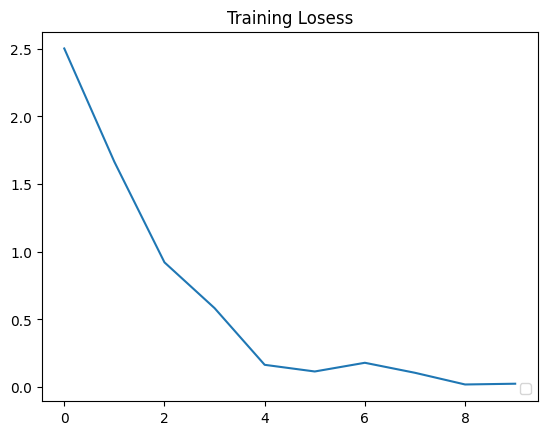

In [124]:
# Train the model
losses = []
for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)

        # Forward pass
        outputs = model(words)
        # if y would be one-hot, we must apply
        #labels = torch.max(labels, 1)[1]
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        losses.append(float(loss.item()))

plt.plot(np.array(losses))
plt.title('Training Losess')
plt.legend(loc='lower right')
plt.show()


In [125]:
data = {
    "model_state": model.state_dict(),
    "input_size": input_size,
    "hidden_size": hidden_size,
    "output_size": output_size,
    "all_words": all_words,
    "tags": tags,
}

In [126]:
FILE = "data.pth"
torch.save(data, FILE)

In [127]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [128]:
with open("starwars_bar.json", "r", encoding="utf-8" ) as json_data:
    intents = json.load(json_data)

In [129]:
FILE = "data.pth"
data = torch.load(FILE)

In [130]:
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data["all_words"]
tags = data["tags"]
model_state = data["model_state"]

In [131]:
model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNet(
  (l1): Linear(in_features=157, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=16, bias=True)
  (relu): Sigmoid()
)

In [132]:
bot_name = "DROID"

In [133]:
def get_response(msg):
    sentence = tokenize(msg)
    X = bag_of_words(sentence, all_words)
    X = X.reshape(1, X.shape[0])
    X = torch.from_numpy(X).to(device)

    output = model(X)
    _, predicted = torch.max(output, dim=1)

    tag = tags[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.75:
        for intent in intents["intents"]:
            if tag == intent["tag"]:
                return random.choice(intent["responses"])

    return "Извините, я вас не понял..."

In [134]:
BG_GRAY = "#ABB2B9"
BG_COLOR = "#17202A"
TEXT_COLOR = "#EAECEE"

FONT = "Helvetica 14"
FONT_BOLD = "Helvetica 13 bold"

In [135]:
class ChatApplication:
    def __init__(self):
        self.window = Tk()
        self._setup_main_window()

    def run(self):
        self.window.mainloop()

    def _setup_main_window(self):
        self.window.title("Чат")
        self.window.resizable(width=False, height=False)
        self.window.configure(width=1024, height=768, bg=BG_COLOR)

        # head label
        head_label = Label(
            self.window,
            bg=BG_COLOR,
            fg=TEXT_COLOR,
            text="Добро пожаловать",
            font=FONT_BOLD,
            pady=10,
        )
        head_label.place(relwidth=1)

        # tiny divider
        line = Label(self.window, width=450, bg=BG_GRAY)
        line.place(relwidth=1, rely=0.07, relheight=0.012)

        # text widget
        self.text_widget = Text(
            self.window,
            width=20,
            height=2,
            bg=BG_COLOR,
            fg=TEXT_COLOR,
            font=FONT,
            padx=5,
            pady=5,
        )
        self.text_widget.place(relheight=0.745, relwidth=1, rely=0.08)
        self.text_widget.configure(cursor="arrow", state=DISABLED)

        # scroll bar
        scrollbar = Scrollbar(self.text_widget)
        scrollbar.place(relheight=1, relx=0.974)
        scrollbar.configure(command=self.text_widget.yview)

        # bottom label
        bottom_label = Label(self.window, bg=BG_GRAY, height=80)
        bottom_label.place(relwidth=1, rely=0.825)

        # message entry box
        self.msg_entry = Entry(bottom_label, bg="#2C3E50", fg=TEXT_COLOR, font=FONT)
        self.msg_entry.place(relwidth=0.74, relheight=0.06, rely=0.008, relx=0.011)
        self.msg_entry.focus()
        self.msg_entry.bind("<Return>", self._on_enter_pressed)

        # send button
        send_button = Button(
            bottom_label,
            text="Отправить",
            font=FONT_BOLD,
            width=20,
            bg=BG_GRAY,
            command=lambda: self._on_enter_pressed(None),
        )
        send_button.place(relx=0.77, rely=0.008, relheight=0.06, relwidth=0.22)

    def _on_enter_pressed(self, event):
        msg = self.msg_entry.get()
        self._insert_message(msg, "Вы")

    def _insert_message(self, msg, sender):
        if not msg:
            return

        self.msg_entry.delete(0, END)
        msg1 = f"{sender}: {msg}\n\n"
        self.text_widget.configure(state=NORMAL)
        self.text_widget.insert(END, msg1)
        self.text_widget.configure(state=DISABLED)

        msg2 = f"{bot_name}: {get_response(msg)}\n\n"
        self.text_widget.configure(state=NORMAL)
        self.text_widget.insert(END, msg2)
        self.text_widget.configure(state=DISABLED)

        self.text_widget.see(END)


if __name__ == "__main__":
    app = ChatApplication()
    app.run()